In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

# Final Setup

In [2]:
dm = 2/1000
hfact = 1.2

In [3]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.281849,-0.135624,0.037227,-0.000138,0.000378,0.000276,0.080419,1.578074,6.645105
1,-0.003247,-0.045003,0.058725,-0.000625,0.000458,-0.000430,0.054860,1.578655,20.931894
2,-0.045068,0.133308,-0.202491,0.000011,-0.000062,-0.000100,0.065507,1.577978,12.294236
3,-0.103340,0.049081,-0.095816,0.000620,-0.000300,0.000404,0.057280,1.578119,18.388909
4,0.014959,-0.246696,-0.035499,0.001254,-0.000372,-0.000629,0.065914,1.578301,12.067933
...,...,...,...,...,...,...,...,...,...
995,0.125529,-0.035396,-0.044301,0.000938,-0.000502,0.000546,0.056773,1.577982,18.885894
996,0.303296,-0.059849,0.060753,-0.000064,0.000198,-0.000429,0.080320,1.578353,6.669655
997,-0.118925,-0.123230,0.264049,0.000454,-0.000105,0.000148,0.080294,1.578866,6.676075
998,-0.166646,-0.225402,0.142864,-0.000647,0.000767,0.000500,0.080208,1.578490,6.697669


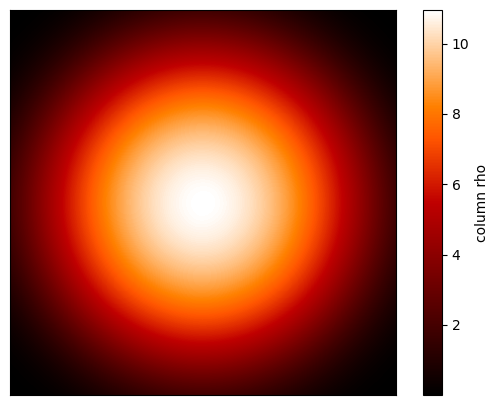

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

# Angular Momentum Conservation

In [5]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

In [6]:
T = 87
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/toy_star/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = 0.5*lin_mom[ii-1] + np.sum(df['u'])

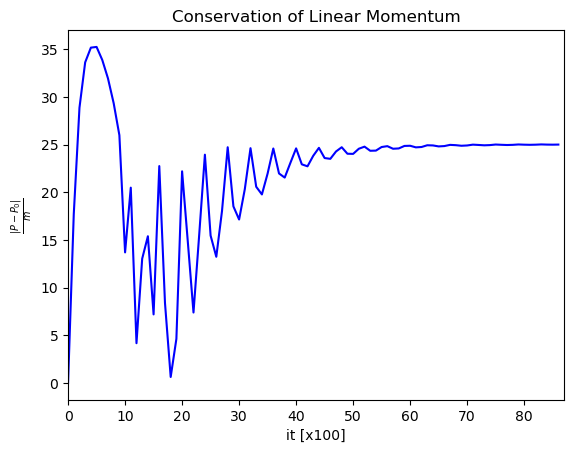

In [7]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T)
plt.show()

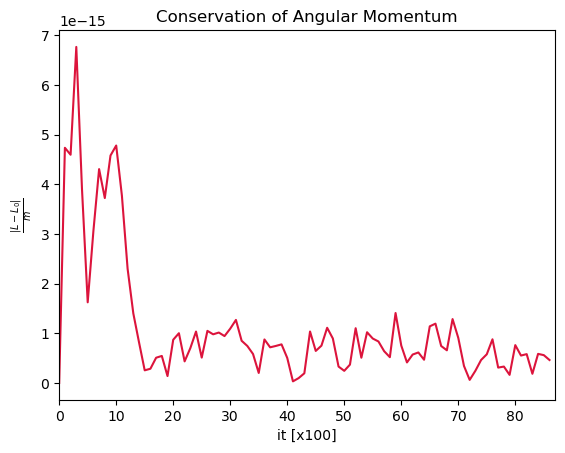

In [8]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T)
plt.show()

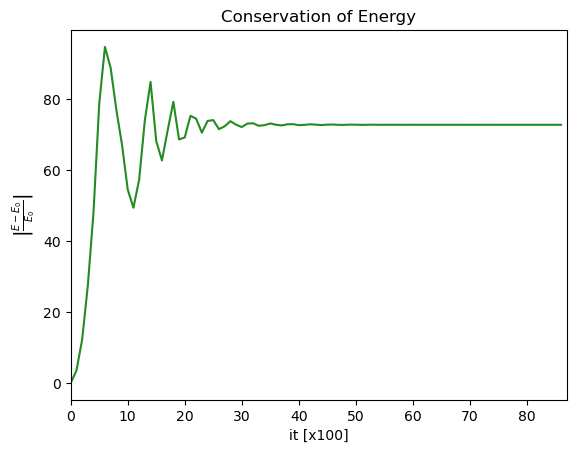

In [9]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T)
plt.show()